## 3. 교차분석

### 3.1 카이제곱 검정
+ 카이제곱 분포에 기초한 통계 방법
+ 독립변수가 범주형 자료인 경우 사용
+ 각 범주에 따른 결과변수의 분포를 설명하거나, 범주형 변수가 2개 이상인 경우 두 변수가 상관이 있는지를 검정함
+ 기본가정 : 각 범주의 기대빈도가 5이상이어야 함

### 3.2 교차분석 개념
+ 범주형 자료인 두 변수 간의 관계를 알아보기 위해 실시하는 분석 기법
+ 적합성 검정, 독립성 검정, 동질성 검정에 사용되며, 카이제곱 검정통계량을 이용함
+ 교차분석은 교차표에서 각 셀의 관찰빈도와 기대빈도 간의 차이를 검정함
  + 관찰빈도 : 자료로부터 얻은 빈도분포
  + 기대빈도 : 두 변수가 독립일 때 이론적으로 기대할 수 있는 빈도 분포

### 3.3 적합성, 독립성, 동질성 검정

__적합성 검정__  
+ 각 범주에 따른 데이터의 빈도분포가 이론적으로 기대하는 분포를 따르는지를 검정함
+ 변수가 하나인 경우임  
+ ex) 주사위를 굴렸을 때, 각 주사위의 값이 1/6 의 확률로 등장하는 게 맞는지 검정

__독립성 검정__
+ 두 개 이상의 범주형 변수에 대해서, 그 변수들의 관계에 따라 값들의 분포가 유의미한 차이를 보이는지를 검정  
+ ex) 고객의 지역과 보험 가입 여부가 주어졌을 때 지역에 따른 보험 가입 비율의 차이가 존재하는지 검정

__동질성 검정__
+ 부모집단의 관측값들이 정해진 범주 내에서 서로 비슷하게 나타나고 있는지를 검정  
+ ex) 남학생의 TV 프로그램 선호도와 여학생의 TV 프로그램 선호도가 동일한지 검정


#### 3.3.1 동질성 검정과 독립성 검정의 차이
+ 동질성 검정은 범주 A에 대해 범주 B의 수준들이 같은 빈도로 나타나는지 검정
+ 독립성 검정은 범주 A와 범주 B가 독립적인지 검정하는 것

### 3.4 적합성 검정 예시
+ 실험에서 얻어진 관측값들이 예상한 이론과 일치하는지 아닌지를 검정하는 방법
+ 관측값들이 어떠한 이론적 분포를 따르고 있는지 관찰할 수 있음
+ 모집단 분포에 대한 가정이 옳게 됐는지 관측 자료와 비교하여 검정하는 것
+ 검정 통계량
  + 카이제곱 통계량 값이 큰 경우 : 관찰도수와 기대도수의 차이가 크고 적합도가 낮음(일치한다고 볼 수 없다)
  + 카이제곱 통계량 값이 작은 경우 : 관찰도수와 기대도수의 차이가 작고 적합도가 높음(일치한다고 볼 수 있다)

> scipy.stats.chisquare(f_obs, f_exp = None)  
f_obs : 각 범주에서 관찰된 빈도  
f_exp : 각 카테고리의 예상 빈도

titanic 데이터에서 sex 변수에 대한 분할표를 생성하고 아래의 가설에 대한 적합도 검정을 수행하세요.

- 귀무가설 : 전체 응답자 성비 => 남자 : 여자 = 50 : 50
- 대립가설 : 귀무가설이 아니다.

In [1]:
import pandas as pd
titanic = pd.read_csv('https://raw.githubusercontent.com/phong0104/Alex_Lee_SNU_EduTech/9e65152ae7b230d9c940d03dbdc9e468f69cf426/Certificate/(2)%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%20%EC%A0%84%EB%AC%B8%EA%B0%80%20%EC%8B%A4%EA%B8%B0/Ver.2/data/titanic.csv')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,embark_town
0,0,3,male,22.0,1,0,7.2500,S,Third,True,Southampton
1,1,1,female,38.0,1,0,71.2833,C,First,False,Cherbourg
2,1,3,female,26.0,0,0,7.9250,S,Third,False,Southampton
3,1,1,female,35.0,1,0,53.1000,S,First,False,Southampton
4,0,3,male,35.0,0,0,8.0500,S,Third,True,Southampton


In [2]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   adult_male   891 non-null    bool   
 10  embark_town  889 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 70.6+ KB


In [22]:
table = titanic['sex'].value_counts()
table

sex
male      577
female    314
Name: count, dtype: int64

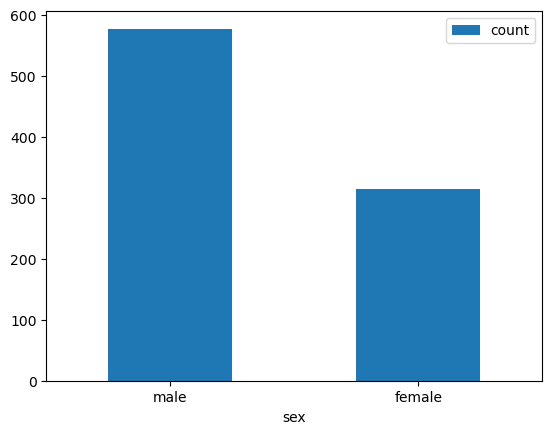

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

table.plot(kind = 'bar', rot = 0)

In [7]:
len(titanic['sex']) / 2

445.5

In [13]:
from scipy.stats import chisquare
chi = chisquare(table, f_exp = [445.5, 445.5])
statistic, pvalue = chi

print('[적합도 검정]')
print('검정통계량 : {}, p-value : {}'.format(statistic, pvalue))

[적합도 검정]
검정통계량 : 77.63075196408529, p-value : 1.2422095313910336e-18


[결과 해석]
+ pvalue 가 유의수준 0.05보다 작으므로 귀무가설을 기각한다. 즉 남녀의 성비가 5대5가 아니다.

### 3.5 독립성 검정 예시
+ 모집단이 두 개의 변수 A,B 에 의해 범주화되었을 때, 이 두 변수들 사이의 관계가 독립인지 아닌지 검정하는 것
+ 교차표를 활용함
> scipy.stats.chi2_contingency(observed)  
observed : 교차표(각 범주에서의 발생 횟수 표)

titanic 데이터에서 좌석등급(class)과 생존 여부(survived)가 서로 독립인지 확인하기 위해 분할표를 생성하고, 아래 가설에 대한 독립성 검정을 수행하라.
+ H0 : class와 survived 는 독립이다.
+ H1 : class와 survived 는 독립이 아니다.

In [33]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,embark_town
0,0,3,male,22.0,1,0,7.2500,S,Third,True,Southampton
1,1,1,female,38.0,1,0,71.2833,C,First,False,Cherbourg
2,1,3,female,26.0,0,0,7.9250,S,Third,False,Southampton
3,1,1,female,35.0,1,0,53.1000,S,First,False,Southampton
4,0,3,male,35.0,0,0,8.0500,S,Third,True,Southampton


In [34]:
# 변수 분할표 생성
table = pd.crosstab(titanic['class'], titanic['survived'])
table

survived,0,1
class,,
First,80,136
Second,97,87
Third,372,119


In [35]:
from scipy.stats import chi2_contingency
statistic, pvalue, df, expect = chi2_contingency(table)

print(['독립성 검정'])
print('검정통계량 :', statistic)
print('p_value :', pvalue)
print('자유도 :', df)
print('기대값 :', expect)

['독립성 검정']
검정통계량 : 102.88898875696056
p_value : 4.549251711298793e-23
자유도 : 2
기대값 : [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


[결과 해석]
+ p-value 가 유의수준 0.05보다 작으므로 귀무가설을 기각
+ 즉, class와 survived 는 독립이 아니라고 할 수 있다.

### 3.6 동질성 검정
+ 모집단이 임의의 변수에 따라 R개의 속성으로 범주화되었을 때, R개의 부분 모집단에서 추출한 표본이 C개의 범주화된 집단의 분포가 서로 동일한지 검정
+ 교차표를 활용하며, __계산법과 검증법은 모두 독립성 검정과 같은 방법으로 진행__

- 귀무가설 : class의 분포는 survived에 관계없이 동일하다  
- 대립가설 : class의 분포는 survived에 관계없이 동일하지 않다.

In [37]:
table

survived,0,1
class,,
First,80,136
Second,97,87
Third,372,119


In [38]:
from scipy.stats import chi2_contingency
statistic, pvalue, df, expect = chi2_contingency(table)

[검정 결과]
+ 동질성 검정 결과 p-value 가 유의수준 0.05보다 작으므로 귀무가설을 기각한다.
+ 좌석등급의 분포는 생존 분포와 동일하지 않다.